<a href="https://colab.research.google.com/github/snatched11/100-Days-Of-PyTorch/blob/main/Day%206-%20DATASETS_%26_DATALOADERS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Example dataset (x = input, y = target)
x = torch.tensor([[1.0],[2.0],[3.0],[4.0]])
y = torch.tensor([[1.0],[4.0],[9.0],[16.0]])

# Wrap tensors in TensorDataset
dataset = TensorDataset(x, y)


In [3]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)


* batch_size=2 → returns 2 examples per iteration

* shuffle=True → random order each epoch

**🔹 Iterating Through Batches**

In [4]:
for x_batch, y_batch in dataloader:
    print("Batch x:", x_batch)
    print("Batch y:", y_batch)


Batch x: tensor([[1.],
        [3.]])
Batch y: tensor([[1.],
        [9.]])
Batch x: tensor([[4.],
        [2.]])
Batch y: tensor([[16.],
        [ 4.]])


In [5]:
import torch.nn as nn
import torch.optim as optim

# Define MLP (from Day 5)
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 4)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(4, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = MLP()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [6]:
for epoch in range(500):
    for x_batch, y_batch in dataloader:
        optimizer.zero_grad()           # Clear gradients
        y_hat = model(x_batch)          # Forward pass
        loss = loss_fn(y_hat, y_batch)  # Compute loss
        loss.backward()                 # Backward pass
        optimizer.step()                # Update weights

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 87.4413
Epoch 100, Loss: 1.0301
Epoch 200, Loss: 1.2355
Epoch 300, Loss: 0.6362
Epoch 400, Loss: 0.7203


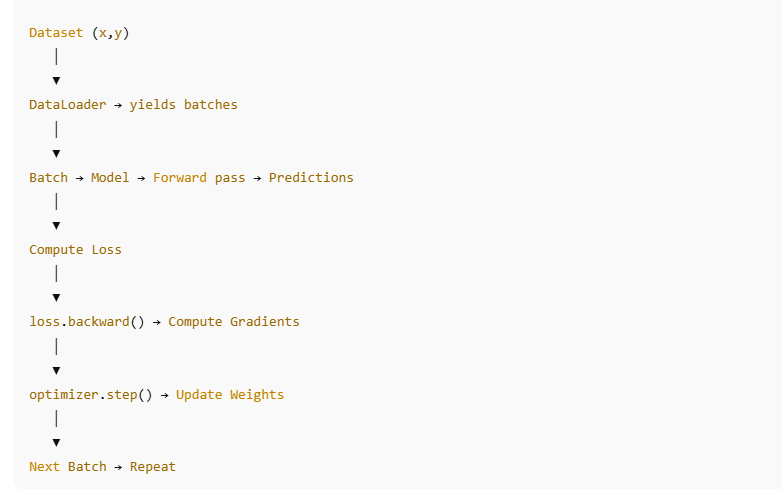

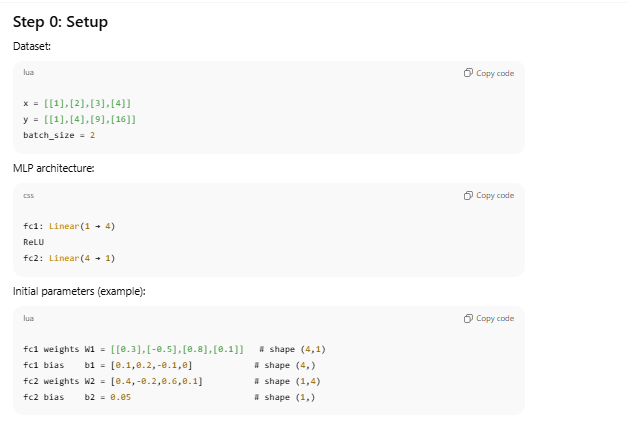

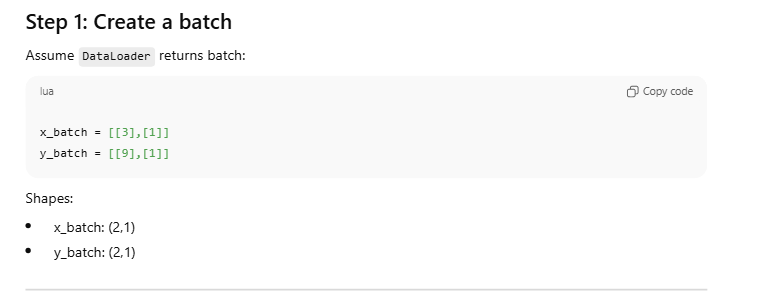

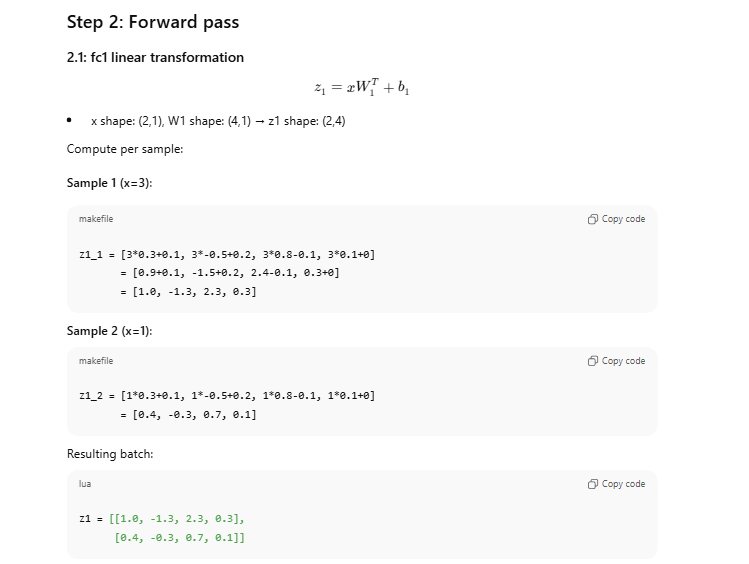

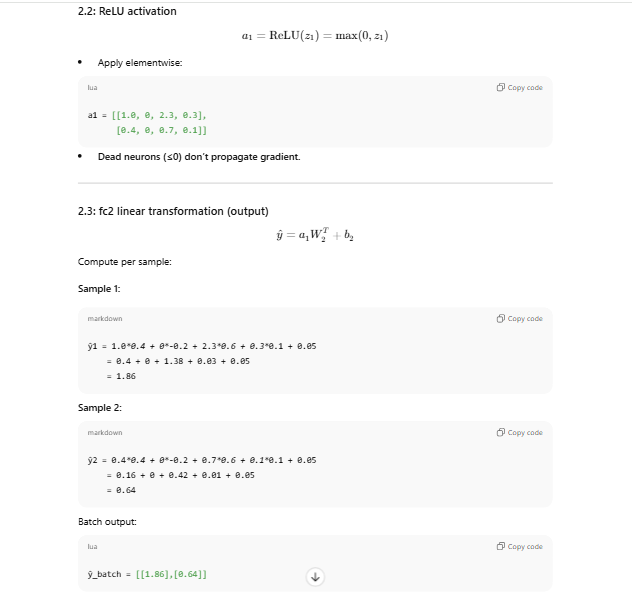

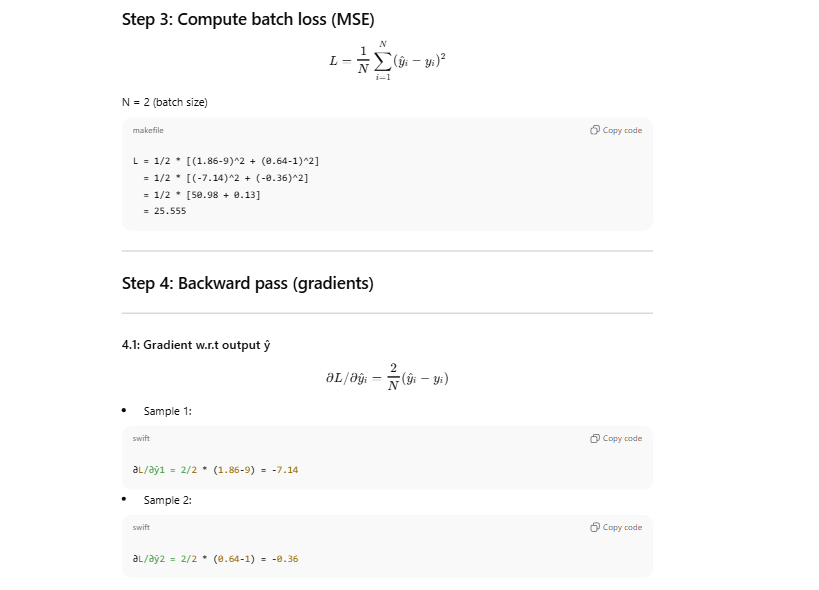

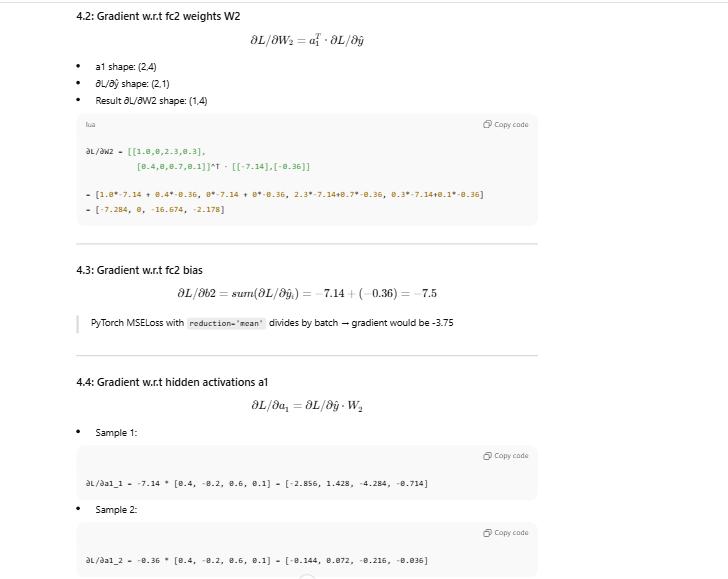

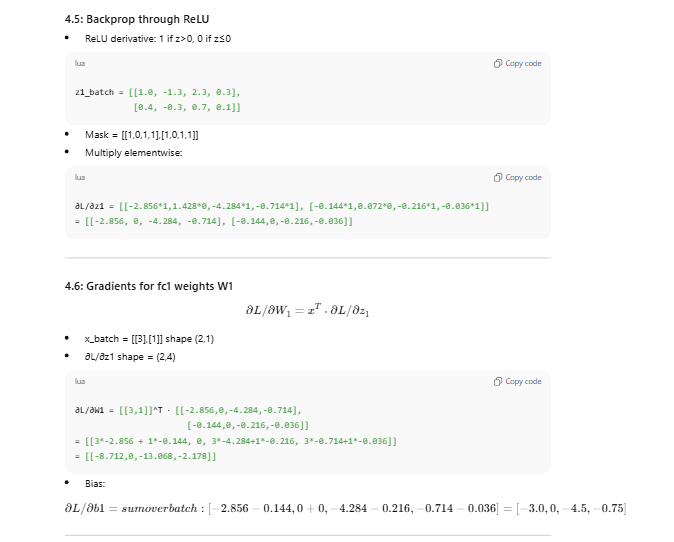

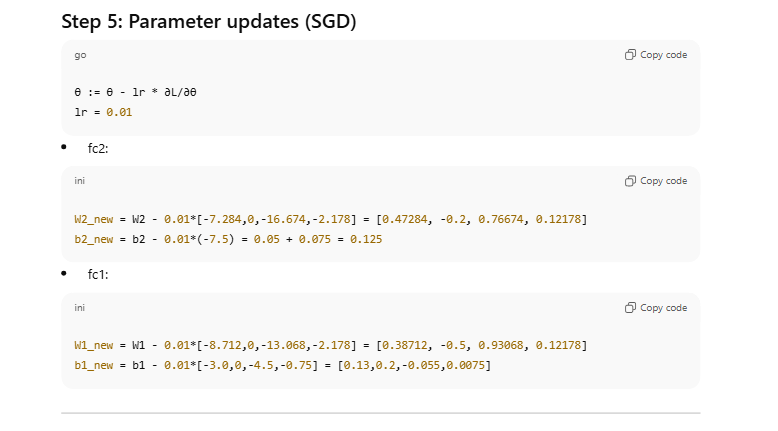

**Why do we use batches instead of single samples?**

We use batches primarily for two reasons:

Computational Efficiency: Modern hardware (GPUs) is designed for parallel processing. Processing 32 samples at once is often nearly as fast as processing one because the GPU can perform the math in parallel.

Stability: A single sample might be an outlier with a very noisy gradient. A batch provides an average gradient that is a more stable estimate of the "true" direction the model should learn.

**What is the difference between Dataset and DataLoader?**
Think of this as a Library vs. a Librarian:

Dataset: This is the container. It holds your data (images, text, etc.) and knows how to give you a single item when you ask for it via an index.

DataLoader: This is the engine. It handles the "logistics": grabbing samples from the Dataset, grouping them into batches, shuffling them, and using multiple CPU cores to load data so the GPU doesn't have to wait

**How does shuffle=True affect training?**

If your data is ordered (e.g., all "Cats" followed by all "Dogs"), the model will learn to predict "Cat" for the first half of the epoch and "Dog" for the second. It will never learn the actual features. Shuffling ensures that every batch is a representative mix, preventing the model from learning the sequence of the data rather than the patterns.

**How are gradients computed across a batch?**

When you pass a batch through a model, the loss is typically calculated as the mean (average) loss of all samples in that batch.4$$\text{Batch Loss} = \frac{1}{N} \sum_{i=1}^{N} L_i$$The gradients are then computed based on this average loss. This means the weight update reflects the "consensus" of the entire batch.

**Why is batch_size important for GPU memory?**

The GPU must store the activations for every single sample in a batch to perform backpropagation.

Large Batch: More parallelization (fast), but consumes massive VRAM. If it's too big, you'll get an Out of Memory (OOM) error.

Small Batch: Less VRAM, but training is slower because you aren't fully utilizing the GPU's parallel cores.

**How would you handle sequences of different lengths?**

Neural networks require fixed-size tensors. If one sentence has 5 words and another has 10, we use:

Padding: Adding "empty" tokens (zeros) to the shorter sequences so they match the longest one in the batch.

Masking: Telling the model to ignore those "empty" tokens during calculation.